In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [29]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train = pd.read_csv("../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
train.drop('Loan_ID',axis=1,inplace=True)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [34]:
train['Credit_History']= train['Credit_History'].fillna(train['Credit_History'].median())

In [35]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [37]:
df.dropna(inplace=True)

In [38]:
df.shape

(480, 13)

In [39]:
df['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [40]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [41]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [42]:
df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [43]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7effa43126d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7effa4315090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7effa4312b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7effa4315710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7effa431de90>],
 'means': []}

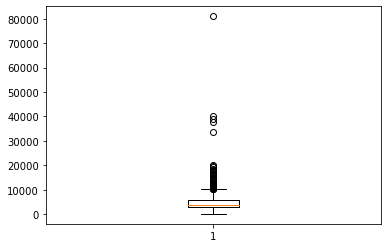

In [44]:
plt.boxplot(df['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7effa42496d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7effa424f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7effa4249190>],
 'medians': [<matplotlib.lines.Line2D at 0x7effa424fc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7effa42551d0>],
 'means': []}

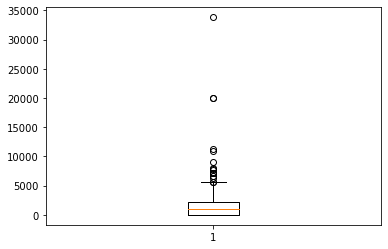

In [45]:
plt.boxplot(df['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7effa41b44d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7effa41b4f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7effa41acf50>],
 'medians': [<matplotlib.lines.Line2D at 0x7effa41bba50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7effa41bbf90>],
 'means': []}

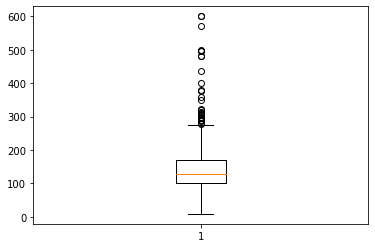

In [46]:
plt.boxplot(df['LoanAmount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7effa419bc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7effa41216d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7effa419b6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7effa412a1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7effa412a710>],
 'means': []}

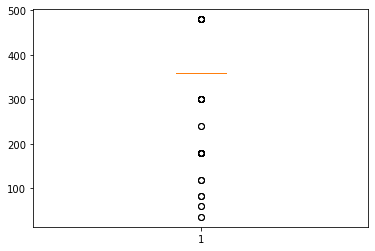

In [47]:
plt.boxplot(df['Loan_Amount_Term'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7effa4102690>,
 'caps': [<matplotlib.lines.Line2D at 0x7effa4108150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7effa4102150>],
 'medians': [<matplotlib.lines.Line2D at 0x7effa4108c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7effa4110190>],
 'means': []}

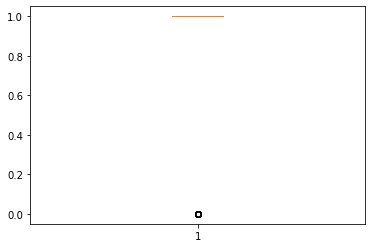

In [48]:
plt.boxplot(df['Credit_History'])

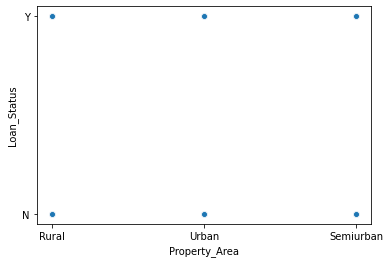

In [49]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=df)

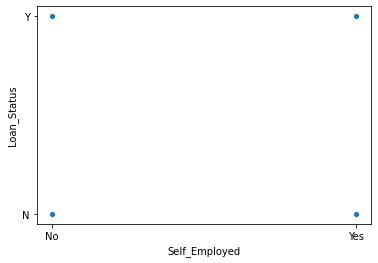

In [50]:
sns.scatterplot(x='Self_Employed',y='Loan_Status',data=df)

In [51]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98


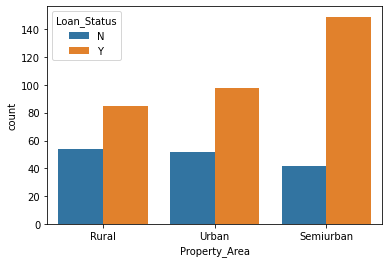

In [52]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

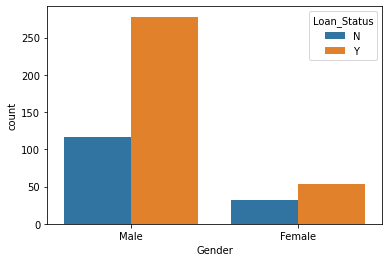

In [53]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

In [54]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


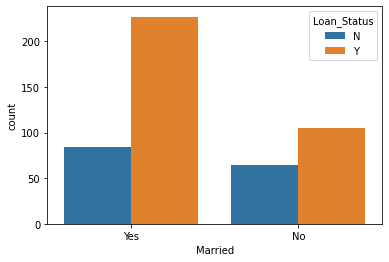

In [55]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

In [56]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43


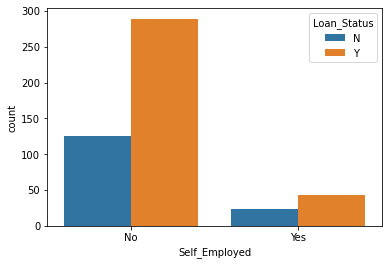

In [57]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

In [58]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61


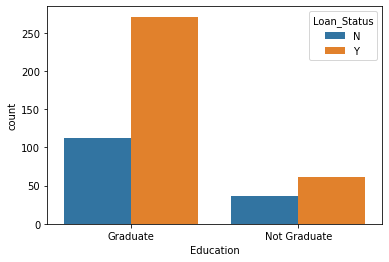

In [59]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

In [60]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

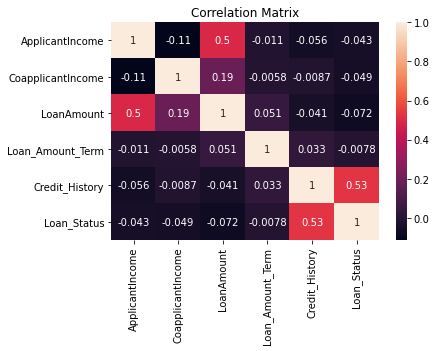

In [61]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

In [62]:
df2=df.drop(labels=['ApplicantIncome'],axis=1)

In [63]:
df2=df2.drop(labels=['CoapplicantIncome'],axis=1)

In [64]:
df2=df2.drop(labels=['LoanAmount'],axis=1)

In [65]:
df2=df2.drop(labels=['Loan_Amount_Term'],axis=1)

In [66]:
df2=df2.drop(labels=['Loan_ID'],axis=1)

In [67]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,1.0,Urban,1


In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()

In [69]:
df2['Property_Area']=le.fit_transform(df2['Property_Area'])

In [70]:
df2['Dependents']=le.fit_transform(df2['Dependents'])

In [71]:
df2=pd.get_dummies(df2)

In [72]:
df2.dtypes

Dependents                  int64
Credit_History            float64
Property_Area               int64
Loan_Status                 int64
Gender_Female               uint8
Gender_Male                 uint8
Married_No                  uint8
Married_Yes                 uint8
Education_Graduate          uint8
Education_Not Graduate      uint8
Self_Employed_No            uint8
Self_Employed_Yes           uint8
dtype: object

In [73]:
df2=df2.drop(labels=['Gender_Female'],axis=1)

In [74]:
df2=df2.drop(labels=['Married_No'],axis=1)

In [75]:
df2=df2.drop(labels=['Education_Not Graduate'],axis=1)

In [76]:
df2=df2.drop(labels=['Self_Employed_No'],axis=1)

In [77]:
df2.head()

,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes
1,1,1.0,0,0,1,1,1,0
2,0,1.0,2,1,1,1,1,1
3,0,1.0,2,1,1,1,0,0
4,0,1.0,2,1,1,0,1,0
5,2,1.0,2,1,1,1,1,1


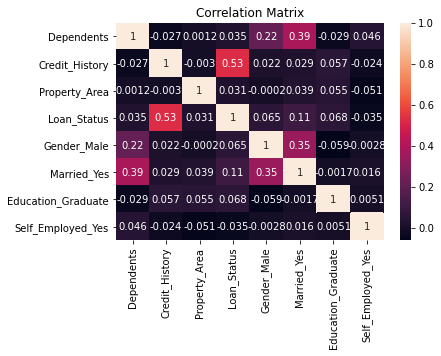

In [78]:
plt.title('Correlation Matrix')
sns.heatmap(df2.corr(),annot=True)

In [79]:
df2=df2.drop('Self_Employed_Yes',1)

In [80]:
df2=df2.drop('Dependents',1)

In [81]:
df2=df2.drop('Education_Graduate',1)

In [82]:
X=df2.drop('Loan_Status',1)

In [83]:
Y=df2['Loan_Status']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [86]:
print('Shape of X_train is: ',x_train.shape)
print('Shape of X_test is: ',x_test.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (384, 4)
Shape of X_test is:  (96, 4)
Shape of Y_train is:  (384,)
Shape of y_test is:  (96,)


In [87]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [88]:
log.fit(x_train,y_train)

LogisticRegression()

In [89]:
log.score(x_train,y_train)

0.8020833333333334

In [90]:
pred=log.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_test,pred)

0.8333333333333334

In [93]:
from sklearn import metrics

In [94]:
metrics.confusion_matrix(y_test,pred)

array([[12, 14],
       [ 2, 68]])

In [95]:
metrics.recall_score(y_test,pred)

0.9714285714285714

In [96]:
metrics.precision_score(y_test,pred)

0.8292682926829268

In [97]:
metrics.f1_score(y_test,pred)

0.8947368421052632

In [98]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [99]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
clf.score(x_train,y_train)

0.8072916666666666

In [102]:
pred1=clf.predict(x_test)

In [103]:
accuracy_score(y_test,pred1)

0.78125

In [104]:
metrics.confusion_matrix(y_test,pred1)

array([[13, 13],
       [ 8, 62]])

In [105]:
metrics.f1_score(y_test,pred1)

0.8551724137931035

In [106]:
metrics.recall_score(y_test,pred1)

0.8857142857142857

In [107]:
metrics.precision_score(y_test,pred1)

0.8266666666666667